In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("Algerian_Forest_Clean.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df=df.drop(columns=['day','month','year'],axis=1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.Classes.value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [5]:
df.Classes=df.Classes.str.strip()
df.Classes=np.where(df["Classes"].str.contains('not'),0,1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [6]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


# Independent and Dependent Feature

In [7]:
X=df.drop(columns=["FWI"],axis=1)
y=df["FWI"]

In [8]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=45,shuffle=True)

In [11]:
X_train.shape

(182, 11)

In [12]:
X_test.shape

(61, 11)

## Feature selection based on co-relation

Defaulting to user installation because normal site-packages is not writeable


<Axes: >

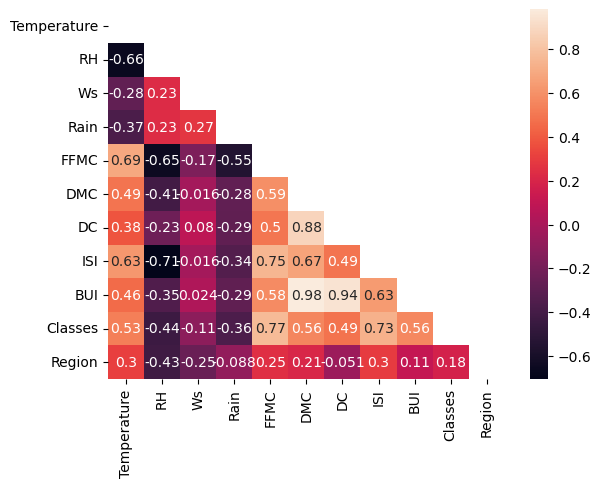

In [13]:
!pip install seaborn --upgrade
mask = np.triu(np.ones_like(X_train.corr(), dtype=np.bool_))
sns.heatmap(X_train.corr(),mask=mask,annot=True)

## Check for multicollinearity

In [14]:
def collinear(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for col in range(len(corr_matrix.columns)):
        for row in range(col):
            if abs(corr_matrix.iloc[col,row])>threshold:
                col_corr.add(corr_matrix.columns[col])
    return col_corr

In [15]:
corr_features=collinear(X_train,0.80)

In [16]:
# Drop features with high level of collinearity
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

## Feature scaling

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [19]:
X_train

array([[ 1.03973391,  0.00396204,  0.21039187, ...,  0.54677005,
         0.85634884,  1.01105006],
       [-0.03239964, -0.97934302, -0.52597966, ..., -0.71718494,
        -1.16774842, -0.98907071],
       [-0.30043303, -0.45491366, -1.63053696, ...,  0.15786082,
         0.85634884, -0.98907071],
       ...,
       [-0.56846642, -1.37266504, -0.1577939 , ...,  0.88706562,
         0.85634884,  1.01105006],
       [ 1.57580069, -1.2415577 , -0.89416543, ..., -0.15812793,
         0.85634884,  1.01105006],
       [ 1.3077673 , -0.586021  , -0.52597966, ...,  0.78983831,
         0.85634884,  1.01105006]])

<Axes: >

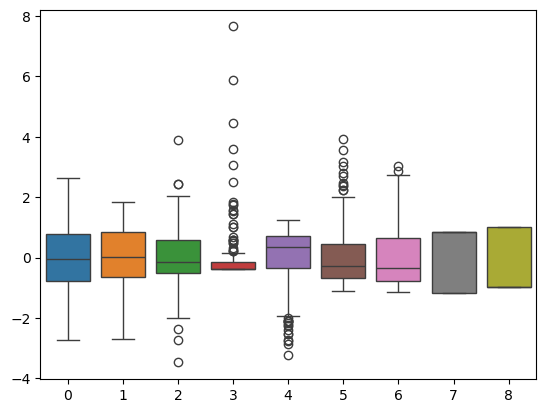

In [20]:
# boxplot -to understand the affect of standard scaler

sns.boxplot(X_train)

In [21]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)
y_pred=regression.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mse=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

In [23]:
print("mse : ", mse, "\nscore :",score)

mse :  1.0280290176567175 
score : 0.8904606375064229


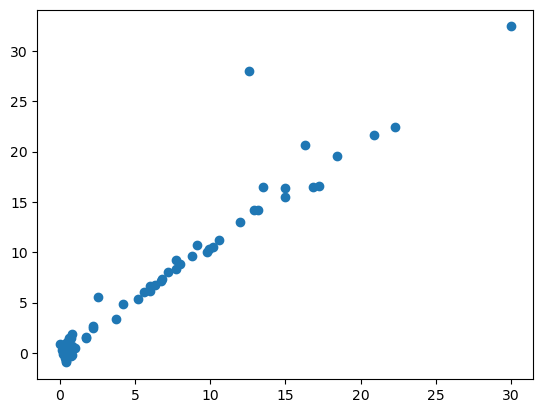

In [24]:
plt.scatter(y_test,y_pred)

# Lasso Regression

mse :  1.1946332022903539 
score : 0.9181813116754691


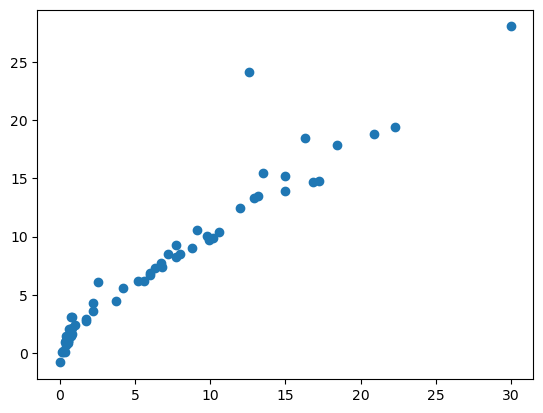

In [25]:
from sklearn.linear_model import Lasso
regression=Lasso()
regression.fit(X_train,y_train)
y_pred=regression.predict(X_test)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mse=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mse : ", mse, "\nscore :",score)
plt.scatter(y_test,y_pred)

## Ridge Regrression

mse :  1.0275665078057339 
score : 0.8933648481800883


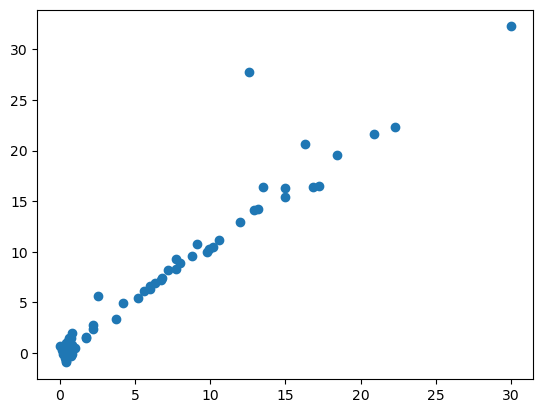

In [26]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mse=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mse : ", mse, "\nscore :",score)
plt.scatter(y_test,y_pred)

## Elastic Net

mse :  1.6788754670332198 
score : 0.897276999523754


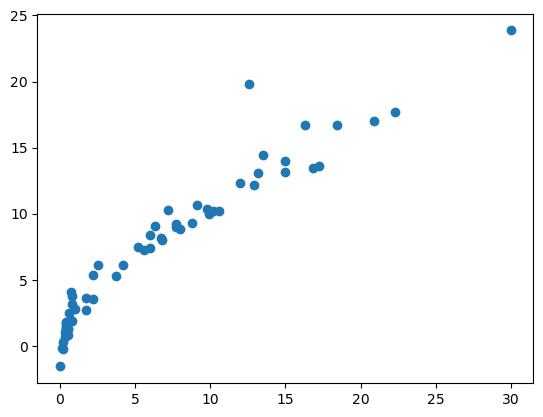

In [27]:
from sklearn.linear_model import ElasticNet
regression=ElasticNet()
regression.fit(X_train,y_train)
y_pred=regression.predict(X_test)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mse=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mse : ", mse, "\nscore :",score)
plt.scatter(y_test,y_pred)

# Cross-Validation

mse :  1.0030781889403206 
score : 0.8931577408229368


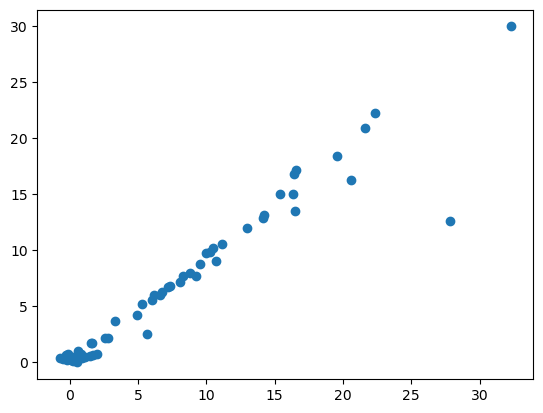

In [28]:
from sklearn.linear_model import LassoCV
lassCV=LassoCV(cv=5)
lassCV.fit(X_train,y_train)
y_pred=lassCV.predict(X_test)
mse=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mse : ", mse, "\nscore :",score)
plt.scatter(y_pred,y_test)

In [29]:
lassCV.alphas_

array([7.09297065, 6.61492817, 6.16910415, 5.75332717, 5.36557218,
       5.00395057, 4.66670105, 4.35218102, 4.05885858, 3.7853051 ,
       3.53018821, 3.29226534, 3.07037767, 2.86344449, 2.67045792,
       2.49047799, 2.32262811, 2.16609075, 2.02010348, 1.88395527,
       1.75698299, 1.63856822, 1.5281342 , 1.42514307, 1.3290932 ,
       1.23951676, 1.15597748, 1.07806847, 1.00541026, 0.93764898,
       0.87445457, 0.81551926, 0.76055599, 0.70929706, 0.66149282,
       0.61691041, 0.57533272, 0.53655722, 0.50039506, 0.46667011,
       0.4352181 , 0.40588586, 0.37853051, 0.35301882, 0.32922653,
       0.30703777, 0.28634445, 0.26704579, 0.2490478 , 0.23226281,
       0.21660907, 0.20201035, 0.18839553, 0.1756983 , 0.16385682,
       0.15281342, 0.14251431, 0.13290932, 0.12395168, 0.11559775,
       0.10780685, 0.10054103, 0.0937649 , 0.08744546, 0.08155193,
       0.0760556 , 0.07092971, 0.06614928, 0.06169104, 0.05753327,
       0.05365572, 0.05003951, 0.04666701, 0.04352181, 0.04058

In [30]:
lassCV.alpha_

0.018839552681517872

In [31]:
lassCV.mse_path_

array([[68.94264817, 94.96565083, 47.19676599, 41.33277872, 31.84725423],
       [64.32256179, 94.96565083, 42.12761595, 35.76708914, 28.09323664],
       [57.88328842, 94.96565083, 37.70177774, 30.94896234, 24.79605915],
       [52.22327577, 87.44524513, 33.71269286, 26.77698902, 21.37061933],
       [47.24503184, 77.99616764, 29.57901888, 23.16577473, 18.41342565],
       [42.86349296, 69.77386744, 25.97676688, 20.04114237, 15.8617615 ],
       [37.80469833, 62.61882342, 22.83708624, 17.33855984, 13.66179498],
       [33.22014855, 55.24483812, 20.10017309, 15.00206878, 11.76623904],
       [29.22322453, 48.59878275, 17.713983  , 12.98308263, 10.13423992],
       [25.73767118, 42.79938551, 15.63298193, 11.23927025,  8.73034635],
       [22.69750407, 37.73716545, 13.81826431,  9.73400971,  7.52380027],
       [20.04529152, 33.31836388, 12.23524126,  8.43545984,  6.48792046],
       [17.73056993, 29.45975578, 10.85404918,  7.31597868,  5.59941737],
       [15.71083384, 26.08941028,  9.6

## Ridge CV

mse :  1.0275665078057339 
score : 0.8933648481800883


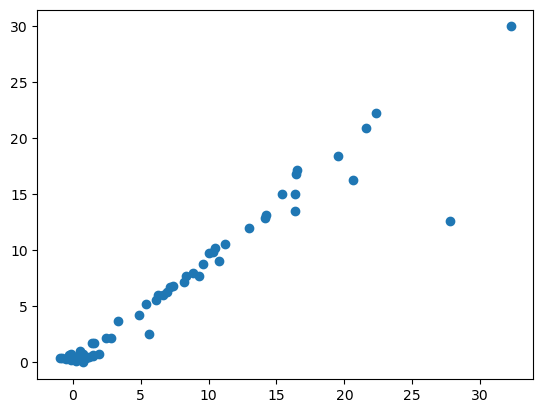

In [32]:
from sklearn.linear_model import RidgeCV
ridgeCV=RidgeCV(cv=5)
ridgeCV.fit(X_train,y_train)
y_pred=ridgeCV.predict(X_test)
mse=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mse : ", mse, "\nscore :",score)
plt.scatter(y_pred,y_test)

## Elastic Net CV

mse :  1.0115211607854717 
score : 0.8950649238057625


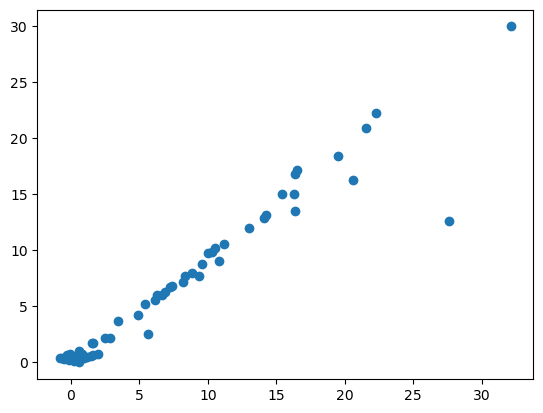

In [33]:
from sklearn.linear_model import ElasticNetCV
elasticNetCV=ElasticNetCV(cv=5)
elasticNetCV.fit(X_train,y_train)
y_pred=elasticNetCV.predict(X_test)
mse=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mse : ", mse, "\nscore :",score)
plt.scatter(y_pred,y_test)

In [35]:
# pickle ml and preprocess
scaler
ridge

Ridge()

In [36]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))